# HTC (Hamburg Test Case) container ship - računska naloga

S pomočjo testa modela ladje v bazenu, določimo upor realne ladje.


In [1]:
import math as mat
import numpy as np
import sympy as sym

import matplotlib as mpl
import matplotlib.pyplot as plt

# set LaTeX fonts
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
sym.init_printing()

In [2]:
# Parametri modela

# Lpp - length between perpendiculars [m]:  
Lpp_m = 5.12;  Lpp_s = 153.7;

# Lwl - length water line [m]:  
Lwl_m = 5.33;  Lwl_s = 160.1;

# Los - length over surface [m]:  
Los_m = 5.51;  Los_s = 165.4;

# B - breadth [m]:
B_m = 0.916;  B_s = 27.5;

# T - draught [m]:
Tf_m = 0.343;  Tf_s = 10.3;
Ta_m = 0.343;  Ta_s = 10.3;

# D - displacemnt [m3]:
D_m = 1.048;  D_s = 28342;

# S - wetted surface [m2]:
S_m = 6.177;  S_s = 5567.0;

# x_b Position centre of buoyancy forward of midship
xb = -0.571; # Lpp

# Cb - block coefficinet:
Cb = 0.650;

# Ratios
rlb =  5.582; # Lpp/B
rbt =  2.673; # B/T
rlt = 14.922; # L/T

# Caam - Air resistance:
Cair = 2.880E-05;

# Propeler diameter [m]
Dp = 6.1;

# Kinematic viscosity [Pa s]:
mu_m = 0.001;  mu_s = 0.001;

# Density [kg/m3]:
rho_m = 1000; rho_s = 1025; 

## Podatki meritev modela v bazenu

V bazenu merimo celoten upor modela $F_m$ [N] za različne hitrosti $V_m$ [m/s]:

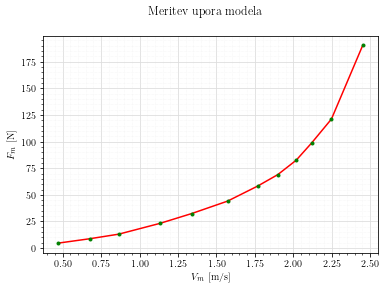

In [3]:
# Data [V_m, F_m]

data = np.array([
    [0.471435991, 4.671381244],
    [0.674799906, 8.740698267],
    [0.864402352, 13.0643476],
    [1.133515502, 23.23764016],
    [1.338408468, 32.39360347],
    [1.572353422, 44.09288991],
    [1.769601129, 58.33549949],
    [1.899570548, 69.01745668],
    [2.018836603, 82.49706932],
    [2.119754034, 98.77433741],
    [2.248194401, 121.155581],
    [2.451558315, 190.3339704]
])

dDim = data.shape[0]

V_m = data.T[0];
F_m = data.T[1];

fig, ax = plt.subplots()
fig.suptitle('Meritev upora modela');

ax.plot(V_m, F_m, 'r-')
ax.plot(V_m, F_m, 'g.')
ax.set_xlabel('$V_m$ [m/s]')
ax.set_ylabel('$F_m$ [N]')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('model_resistance_measurements.pdf')

## Pretvorba meritev v brezdimenzijske vrednosti

Podatke pretvorimo v brezdimenzijsko formo, kjer pretvorimo

- hitrost modela $V_m$ v Froude število
$$
F_r = \frac{V_m}{\sqrt{g \: L_{pp}}}
$$

- silo $F_m$ v koeficient celotnega upora modela
$$
C_T^m = \frac{F_m}{\frac{1}{2} \rho_m \: V_m^2 \: S_m}
$$

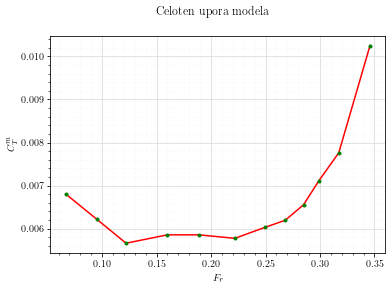

In [4]:
Fn = V_m/mat.sqrt(9.81*Lpp_m)
Ct_m = np.zeros(dDim);
for i in range(dDim):
    Ct_m[i] = F_m[i]/(0.5*rho_m*V_m[i]**2*S_m);

fig, ax = plt.subplots()
fig.suptitle('Celoten upora modela');

ax.plot(Fn, Ct_m, 'r-')
ax.plot(Fn, Ct_m, 'g.')
ax.set_xlabel('$F_r$')
ax.set_ylabel('$C_T^m$')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('model_resistance_total_dimless.pdf')

## Rezidualni del upora

Preostali ali residualni del upora, določimo s formulo

$$
C_R^m = C_T^m - (1+k) C_F^m + C_A^m.
$$

Celotnemu brezdimenzijskem uporu $C_T^m$ tako odštejemo upora trenja $C_F^m$, upor forme $k \: C_F^m$  in upora zraka $C_A^m$. Koeficient forme lahko določimo tudi empirično

$$
k = 0.6 \: \phi + 145.0 \: \phi^{3.5},
$$

kjer je 

$$
\phi = \frac{C_B}{L_{WL}} \sqrt{B(T_A + T_F)}.
$$

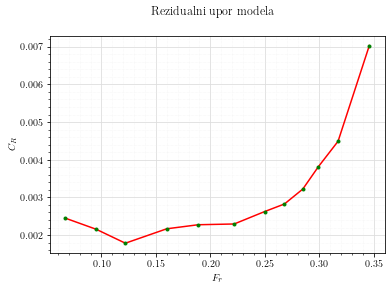

In [5]:
Rn_m = V_m*Lpp_m/(mu_m/rho_m)
phi = Cb/Lpp_m*mat.sqrt(B_m*(Tf_m + Ta_m))
k = 0.6*phi + 145.0*phi**3.5

Cf_m = np.zeros(dDim)
for i in range(dDim):
    Cf_m[i] = 0.075 / (mat.log10(Rn_m[i]) - 2)**2
    
Cr = np.zeros(dDim)
for i in range(dDim):
    Cr[i] = Ct_m[i] - (1+k)*Cf_m[i] - Cair
    
fig, ax = plt.subplots()
fig.suptitle('Rezidualni upor modela');

ax.plot(Fn, Cr, 'r-')
ax.plot(Fn, Cr, 'g.')
ax.set_xlabel('$F_r$')
ax.set_ylabel('$C_R$')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('model_resistance_rezidual.pdf')

## Določitev upora ladje s pomočjo upora modela

Sedaj lahko določimo celoten upor ladje, kjer pa je potrebno upoštevati še podatek o hrapavosti površine. Popravek trenja zaradi hrapavosti površine določimo s  pomočjo Townsin (1990) formule, ki jo je privzel tudi ITTC

$$
\Delta C_F = 0.044 \left[ \left( \frac{H \: 10^{-6}}{L_{WL}} \right)^{1/3} - 10.0 \: R_n^{-1/3}\right] + 1.25 \: 10^{-4}
$$

V primeru testov vzamemo za hrapavost vedno vrednost $H=150$ (hrapavost se meri v *mikronih* [$10^{-6}$m]). 

Koeficient trenja določimo po ITTC'59 formuli

$$
C_F^s = \frac{0.075}{(\log R_e - 2)^2}, ~~~ Re = \frac{V \: L}{\nu}, ~~~ \nu=\frac{\mu}{\rho},
$$

kjer je $R_e$ Reynoldsovo število, $\nu$ pa kinematična viskoznost.

Poleg dodatnega popravka zaradi hrapavosti, je potrebno upoštevati še korelacijski koeficient $C_{ms}$, ki ga določa vsak inštitut zase na podlagi dolgoletnih izkušenj. Korelacijski koeficient določa popravek za meritev med uporom modela in rešitvijo upora ladje. Celoten upor ladje je sedaj enak

$$
C_T^s = (1 + k)(C_F^s + \Delta C_F) + C_R + C_A^s + C_{ms}
$$

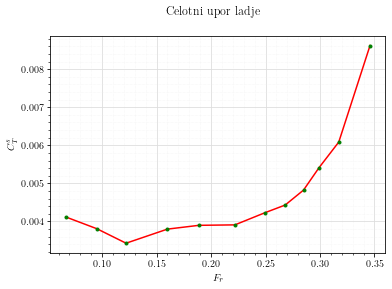

In [6]:
H = 150
Cms = -2.28e-4
V_s = Fn*mat.sqrt(9.81*Lpp_s)
phi = Cb/Lpp_s * mat.sqrt(B_s*(Tf_s + Ta_s))
k = 0.6 * phi + 145 * phi**3.5

Ct_s = np.zeros(dDim)
for i in range(dDim):
    Rn_s = V_s[i] * Lpp_s/(mu_s/rho_s);
    Cf_s = 0.075 / (mat.log10(Rn_s) - 2)**2
    DCf = 0.044 * ((H*1e-6/Lpp_s)**(1/3) - 10*Rn_s**(-1/3)) + 1.25e-4
    Ct_s[i] = (1+k)*(Cf_s + DCf) + Cr[i] + Cair + Cms
    
fig, ax = plt.subplots()
fig.suptitle('Celotni upor ladje');

ax.plot(Fn, Ct_s, 'r-')
ax.plot(Fn, Ct_s, 'g.')
ax.set_xlabel('$F_r$')
ax.set_ylabel('$C_T^s$')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('model_resistance_total_ship_Fr.pdf')

## Celoten upor ladje in efektivna moč

Celoten upor ladje določimo s pomočjo koeficienta celotnega upora

$$
R_T = \frac{1}{2} \: C_T^s \: \rho \: V_s^2 \: S
$$

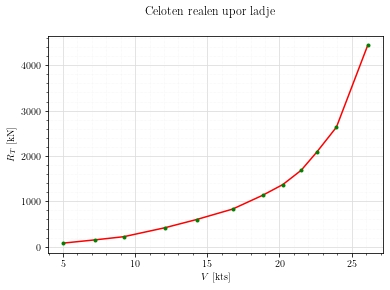

In [7]:
R_s = np.zeros(dDim);
for i in range(dDim):
    R_s[i] = 0.5*rho_s*V_s[i]**2*Ct_s[i]*S_s/1000;

fig, ax = plt.subplots()
fig.suptitle('Celoten realen upor ladje');

ax.plot(V_s*3600/1852, R_s, 'r-')
ax.plot(V_s*3600/1852, R_s, 'g.')
ax.set_xlabel('$V$ [kts]')
ax.set_ylabel('$R_T$ [kN]')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
fig.savefig('model_resistance_total_ship.pdf')

Iskanje optimalne hitrosti poteka na način, da poiščemo najnižji koeficient celotnega upora v intervalu načrtovane hitrosti ladje, ki jo določa ladjar

In [8]:
Fr_opt = 0.16;
Vx_opt = Fr_opt * mat.sqrt(9.81 * Lpp_s) * 3600/1852
Rx_opt = np.interp(Vx_opt, V_s*3600/1852, R_s) # smo interpolirali tabelirane podatke
print('Rx = {:.2f} kN for speed Vx = {:.2f} kts (Fr={:.2f})'.format(Rx_opt, Vx_opt, Fr_opt))

Rx = 418.40 kN for speed Vx = 12.08 kts (Fr=0.16)


Efektivna moč, ki je potrebna za doseganje določene hitrosti

$$
P_{e} = R_s \: V_s
$$

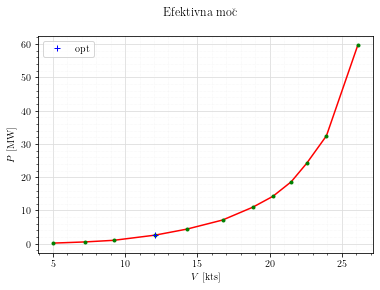

In [9]:
P_eff = np.multiply(R_s,V_s)
P_eff_opt = Rx_opt * Fr_opt * mat.sqrt(9.81 * Lpp_s)

fig, ax = plt.subplots()
fig.suptitle('Efektivna moč');

ax.plot(V_s*3600/1852, P_eff/1000, 'r-')
ax.plot(V_s*3600/1852, P_eff/1000, 'g.')
ax.plot(Vx_opt,P_eff_opt/1000, 'b+', label='opt')
ax.set_xlabel('$V$ [kts]')
ax.set_ylabel('$P$ [MW]')
ax.grid(which='both')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.legend()
fig.savefig('model_eff_power_ship.pdf')

In [10]:
print('P_eff = {:.2f} kW @ v= {:.2f} kts, Fr = {:.3f}, H = {:.1f}'.format(P_eff_opt, Fr_opt * mat.sqrt(9.81 * Lpp_s)*3.6/1.852, Fr_opt, H))

P_eff = 2599.48 kW @ v= 12.08 kts, Fr = 0.160, H = 150.0
